In [85]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, linspace, arange, zeros, ones, eye, linalg, sqrt, sin,exp,pi,inf
import scipy as sp
from scipy import special, optimize, interpolate, fft, fftpack
from scipy.optimize import leastsq, curve_fit
from scipy.integrate import quad
import time
import matplotlib.gridspec as gridspec  # unequal plots
import sympy as sym
import math
%matplotlib inline
plt.rc("font",family="Times New Roman",size=18)

# Computational Physics

## Assignment Week 16

last update: 16-06-2020

### Group Assignments

1. According to the central limit theorem the sum of $N$ random variables $x_{k}$ with means $E_k$ and variances $\sigma_{k}^{2}$ will have a normal distribution with mean $\sum_{k=1}^{N}E_{k}$; and variance $\sigma^{2}=\sum_{k=1}^{N}\sigma_{k}^{2}$, if $N$ is large (theoretically infinite).    
  A uniform variate between -1 and +1 has a variance of 1/3 so that sums of 27 such deviates should have a normal distribution with mean zero and standard deviation $\sigma=3$.   
  Using a uniform random number generator find 100 000 such sums and find the proportions within $\sigma$, 2$\sigma$ and 3$\sigma$ from the mean. For a normal distribution these should be 0.6826, 0.9545 and 0.9973.
 

In [151]:
## 10000 sums-of-27-uniform-random-number
N = 100000

unirand = np.random.random((27,N))*2 - 1
sample = np.sum(unirand, axis=0)
# print(len(sample))
mean = np.mean(sample)
std = np.std(sample)
# std=3
print('For {} sample of sums of 27 uniform random number between -1,1 \n\
the mean is {:.3e}, standard deviation is {:.3e}'.format(N,mean,std))

For 100000 sample of sums of 27 uniform random number between -1,1 
the mean is 4.194e-03, standard deviation is 3.006e+00


In [152]:
## 10000 sums-of-27-uniform-random-number portion
onesigma = np.sum(abs(sample)<std)/N
twosigma = np.sum(abs(sample)<2*std)/N
threesigma = np.sum(abs(sample)<3*std)/N

print('proportion: \n 1sigma:{:.4f} \n 2sigma:{:.4f} \n 3sigma:{:.4f}'.format(onesigma,twosigma,threesigma))

proportion: 
 1sigma:0.6810 
 2sigma:0.9546 
 3sigma:0.9978


---
2. Apply the inverse transformation method to generate a series of random variables $x$ with a distribution function $p(x) = \dfrac{1}{ 2} \sin\pi x$ in the range $0 \leq x \leq 1$. 
   Plot the historgram and compare your result with the theoretical value.
 

先归一化
$$
p_{norm}(x) = A  \frac{1}{2}\sin{\pi x}
$$

该分布的累积分布函数维
$$
F(x) = \int^x_0\frac{A}{2}\sin{\pi x}\\
F(x) = \frac{A}{2\pi}-\frac{A}{2\pi}\cos{\pi x}\\
$$

逆函数

$$
F^{-1}(x) = \frac{1}{\pi}\arccos(1-\frac{2\pi}{A}x)
$$

3.141592653589793


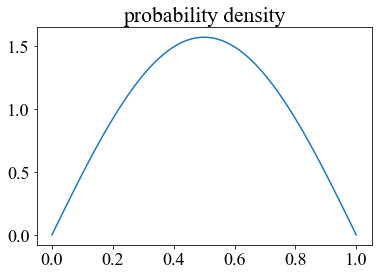

In [141]:
def pfunc(x):
    return np.sin(np.pi*x) / 2

A = 1/quad(pfunc,0,1)[0]
print(A)
def pfunc_norm(x):
    return  A * np.sin(np.pi*x) / 2

xspan = np.linspace(0,1,100)
plt.plot(xspan, pfunc_norm(xspan))
plt.title("probability density");

Text(0.5, 1.0, 'theoraetical distribution F(x)')

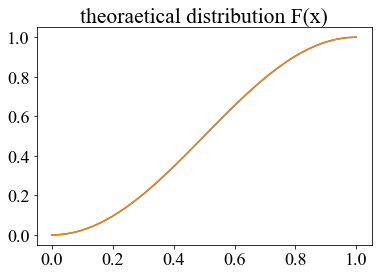

In [144]:
def Ffunc(x):
    return A/2/np.pi *(1- np.cos(np.pi*x))

def inverse_F(x):
    return 1/np.pi * np.arccos(1-2*np.pi*x/A)

plt.plot(xspan, Ffunc(xspan))
plt.plot(xspan, Ffunc(xspan))
plt.title('theoraetical distribution F(x)')

''

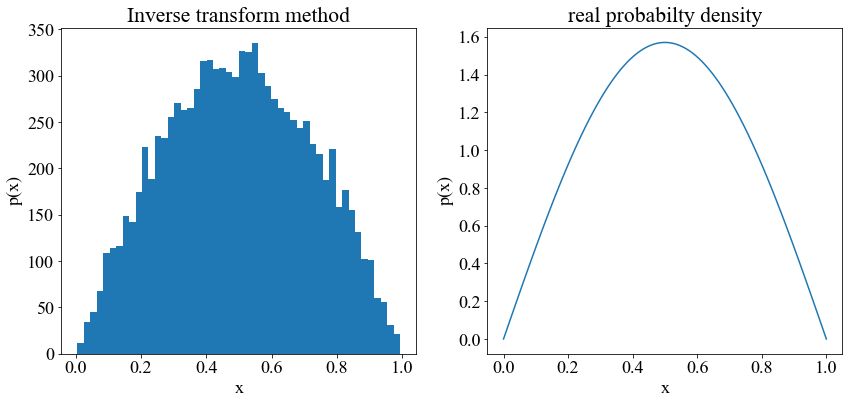

In [146]:
unirandnum = np.random.random(10000)
rand_produce = inverse_F(unirandnum)
fig,axs = plt.subplots(1,2,figsize=(14,6))
axs[0].hist(rand_produce,bins=50)
axs[0].set_title('Inverse transform method')
axs[0].set_xlabel('x')
axs[0].set_ylabel('p(x)')

axs[1].plot(xspan, pfunc_norm(xspan))
axs[1].set_title('real probabilty density')
axs[1].set_xlabel('x')
axs[1].set_ylabel('p(x)')
;


 ---
3. Investigate the behavior of a random walk in which the probabilities for different step directions are not equal. For example, consider a one-dimensional walk with $p_{\text{left}}=0.25$ and $p_{\text{right}}=0.75$. In what sense is the motion still diffusive?

李昆洋

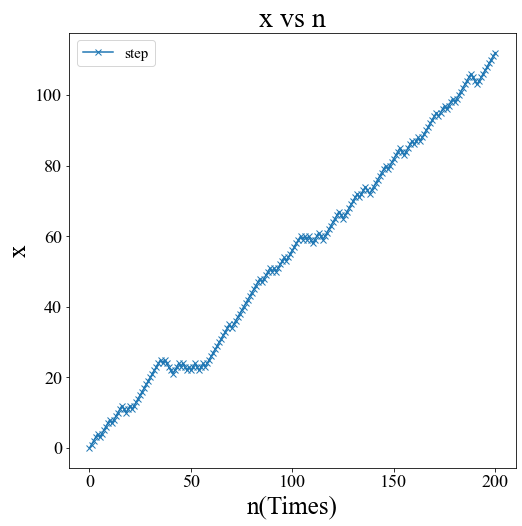

In [18]:
def randomwalk(n,pleft):
    N = int(n)
    t = np.arange(0,n+1)
    dx = 1
    p = np.random.random(n)
    x = np.zeros(n+1)
    for k in range(n):
        if p[k] < pleft:
            x[k+1] = x[k] - dx
        else:
            x[k+1] = x[k] + dx
   
    fig,ax = plt.subplots(figsize=(8,8))
    ax.plot(t,x,'x-',label = 'step')
    ax.legend(fontsize=15);
    ax.set_ylabel('x',fontsize=25)
    ax.set_xlabel('n(Times)',fontsize=25)
    ax.set_title('x vs n', fontsize=28)

randomwalk(200,0.25)

点在漂移drifting，因为，x随时间，总体上一直在变大

---
4. Write a program to simulate a 2-D random walk.

    (1) To increase the amount of randomness, independently choose random values for $\Delta x^{\prime}$ and $\Delta y^{\prime}$ in the range $\left[
    -1,1\right]$. Then normalize them so that each step is of unit length
    $$
     \Delta x=\frac{1}{L}\Delta x^{\prime},\text{ }\Delta y=\frac{1}{L}\Delta
    y^{\prime},\text{ }L=\sqrt{\Delta x^{\prime2}+\Delta y^{\prime2}}%
    $$
    (2) Using a plotting program to draw maps of several independent random walks, each of 1000 steps. Comment on whether these look like what you would expect of a random walk.

    (3) If you have your walker taking $N$ steps in a single trial, then conduct a total number $K\simeq\sqrt{N}$ trials. Each trial should have $N$ steps and start with a different seed. 
    Calculate the mean square distance $R^{2}$ for each trial and then take the average of $R^{2}$ for all your $K$ trials: 
    $$
    \left\langle R^{2}\left(  N\right)  \right\rangle =\frac{1}{K}\sum_{k=1}%
    ^{K}R_{\left(  k\right)  }^{2}\left(  N\right)
    $$
    (4) Plot the root-mean-square distance $R_{\text{rms}}=\left\langle R^{2}\left(  N\right)\right\rangle$ as a function of $\sqrt{N}$. Values of $N$ should start with a small number, where $R\simeq\sqrt{N}$ is not expected to be accurate, and end at a quite large value, where two or three places of accuracy should be expected on the average.

    (5) Check to see if you obtained the expected statistical "error band" of $\pm\sqrt{R}\simeq N^{1/4}$ for large values of $N$.   
    (6) (Optional) Check the validity of the assumptions made in deriving the theoretical result by checking how well 
    $$
    \frac{\left\langle \Delta x_{i}\Delta x_{j\neq i}\right\rangle }{R^{2}}%
    \simeq\frac{\left\langle \Delta x_{i}\Delta y_{j}\right\rangle }{R^{2}}\simeq0 
    $$
    Do your checking for both a single (long) run and for the average over trials.

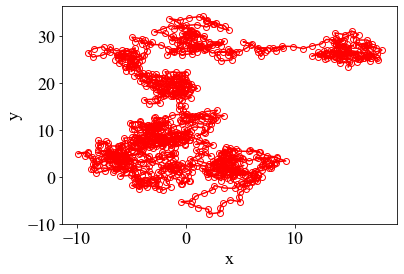

In [6]:
# 1
N = 1000   ## step per trial

x = np.random.random(1000)*2-1
y = np.random.random(1000)*2-1
L = pow(x**2+y**2,1/2)
dx = x/L
dy = y/L

xx = np.zeros(N)
yy = np.zeros(N)

for i in range(N):
    xx[i:] += dx[i]
    yy[i:] += dy[i]
    
plt.plot(xx,yy,'o-r',markerfacecolor='none')
plt.xlabel('x')
plt.ylabel('y');

In [82]:
# 2
def random_walk_drawing():
    fig, axs = plt.subplots(3,2,figsize=(10,15))
    for j in range(6):
        N = 1000    ## step per trial
        ax = axs[j//2,j%2]
        x = np.random.random(N)*2-1
        y = np.random.random(N)*2-1
        L = pow(x**2+y**2,1/2)
        dx = x/L
        dy = y/L

        xx = np.zeros(N)
        yy = np.zeros(N)

        for i in range(N):
            xx[i:] += dx[i]
            yy[i:] += dy[i]

        ax.plot(xx,yy,0.1)
        ax.axhline(0,color='red') # x = 0
        ax.axvline(0,color='red') # y = 0
        ax.set_xlabel('x')
        ax.set_ylabel('y');
    fig.tight_layout()

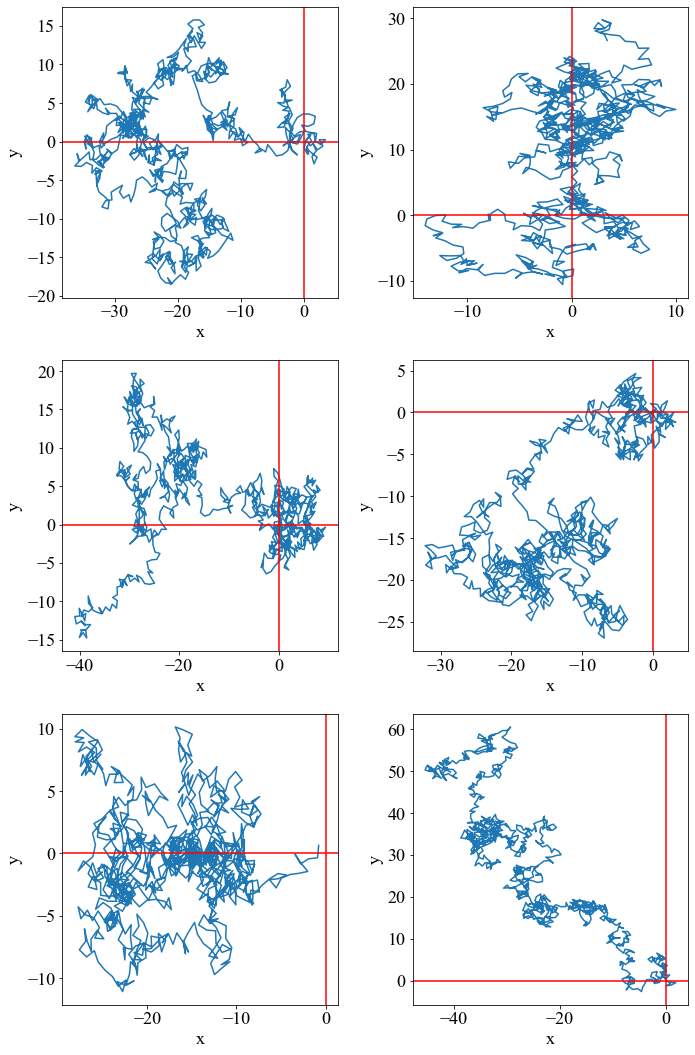

In [83]:
random_walk_drawing()

In [131]:
# 3
def cal_E_R2(N):
    k = int(np.sqrt(N))
    R2 = np.zeros(k)
    rms = np.zeros(k)
    
    for j in range(k):
        
        dx = np.random.random(N)*2-1
        dy = np.random.random(N)*2-1
        L = pow(dx**2+ dy**2,1/2)
        dx_norm = dx/L                  # normalized for each dx
        dy_norm = dy/L                  # normalized for each dy
        
        R2[j] = dx_norm.sum()**2 + dy_norm.sum()**2  ##  R2 是最后的位置离原点的距离的平方
    
    E_R2 = R2.mean()   ## expectation of R^2 => <R^2>
    
    return E_R2

E_R2 = cal_E_R2(1000)
print('For N = {:}, <R^2> is {:}'.format(N, E_R2));

For N = 10000, <R^2> is 698.0851317334439


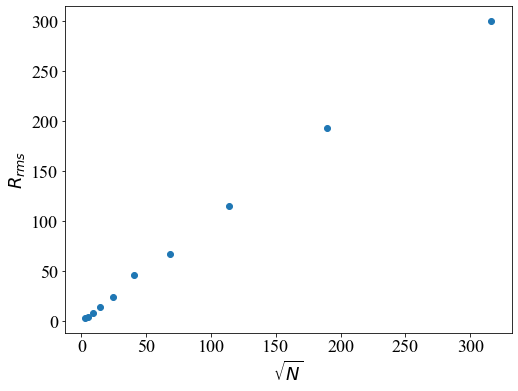

In [132]:
# 4 plot rms as functino of sart(N)
Nlist = np.logspace(1,5,num=10,dtype=int)
# print(Nlist)

rmslist = np.zeros(len(Nlist))

fig, ax = plt.subplots(figsize=(8,6))
for i in range(len(Nlist)):
    n = Nlist[i]
    rms = pow(cal_E_R2(n), 1/2)  ## 开根号得均方根
    rmslist[i] = rms
    
ax.scatter(np.sqrt(Nlist),rmslist,label='N={}'.format(n))    
# plt.legend(fontsize=12)
plt.ylabel('$R_{rms}$')
plt.xlabel('$\sqrt{N}$');

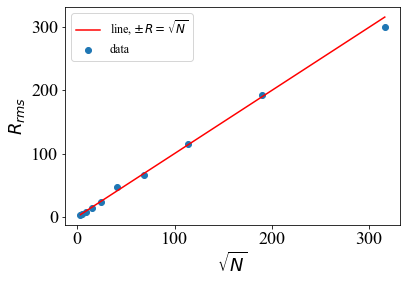

In [133]:
# 5. check expected statistical error band

plt.scatter(np.sqrt(Nlist),rmslist,label='data')   
plt.plot(np.sqrt(Nlist), np.sqrt(Nlist),'r-', label=r'line, $\pm R = \sqrt{N}$')
plt.legend(fontsize=12)
plt.ylabel('$R_{rms}$')
plt.xlabel('$\sqrt{N}$');

### 可以发现是符合的

---
5. Imagine a closed box that is divided into two parts of equal volume. The left half contains a gas of $N$ identical particles and the right half is initially empty. We then make a small hole in the partition between the two halves. We know that after some time, the average number of particles in each half of the box will become $N$, and we say that the system has reached equilibrium.

    ​	Let $n$ be the number of particles in the left part of the box. Because each particle has the same chance to go through the hole, the probability per unit time that a particle moves from left to right equals the number of particles on the left divided by the total number of particles. Write the program so that the following algorithm is implemented:

    -   Generate a random number $r$ from a uniformly distributed set of random numbers in the interval $0\leq r <1$.

    -   If $r\leq p=n/N$, move a particle from left to right, that is $n\rightarrow n-1$; otherwise, $n\rightarrow n+1$.

    (1) Does the time dependence of $n$ appear to be deterministic for sufficient large $N$? 

    Hint: $n(t)=\dfrac{N}{2}\left(1+e^{-2t/N}\right)$

    (2) How long does it take for the system to reach equilibrium? How does this time depend on the number of particles? Choose the total number of particles $N$ to be $N=8,16,64,400,800$, and $3600$.

    (3) A measure of the equilibrium fluctuations is the mean square fluctuation $\Delta n^2$, which is defined as 
    $$
    \begin{aligned}
          \Delta n^2=\langle (n-\langle n\rangle)^2\rangle=\langle n^2\rangle-\langle n\rangle^2
          \end{aligned} 
    $$
    The brackets $\langle \cdots\rangle$ denotes an average taken after the system has reached equilibrium. Modify your program so that averages are taken after equilibrium has been reached. Run for a time that is long enough to obtain meaningful results. How does the relative fluctuations, $\Delta n/\langle n\rangle$, depend on $N$?
 

In [80]:
## how long does it take to reach equilibrium 
def gas(N):
    n = N
    t = 0
    while t < 1e6 and n > N/2:
        if np.random.random(1) <= n/N:
            n = n - 1
        else:
            n = n + 1
        t += 1
        
    return t

Nlist = [8,16,64,400,800,3600]
for nn in Nlist:
    t = gas(nn)
    print('N={}, t={}'.format(nn,t))
    
    

N=8, t=4
N=16, t=12
N=64, t=248
N=400, t=800
N=800, t=1674
N=3600, t=8290


In [108]:
## the situation after equalibrium, start at n = N/2
def n_after_eq(N, tmax=1e6):
    t = 0
    n = np.zeros(int(tmax))
    
    ## start from equuilibrium
    n[0] = N//2
    while t < tmax-1:
        if np.random.random(1) <= n[t]/N:
            n[t+1] = n[t] - 1
        else:
            n[t+1] = n[t] + 1
        t += 1
        
    return n

numbins = [8,16,20,20,20,20]
i = 0
tm = 1e6
narrs = np.zeros((len(numbins),int(tm)))
for N,nbin in zip(Nlist,numbins):
    narrs[i] = eq_fluc(N, tmax=tm)
    i+=1

In [132]:
## calculate mean square
En2 = (narrs**2).mean(axis=1)
En = ((narrs).mean(axis=1))
meansq = En2 - En**2

N = 8, delta n^2 = 1.9968590159359998
N = 16, delta n^2 = 3.9991098036759993
N = 64, delta n^2 = 15.96846724319596
N = 400, delta n^2 = 102.18544649073738
N = 800, delta n^2 = 206.0750064374879
N = 3600, delta n^2 = 1053.7990750558674


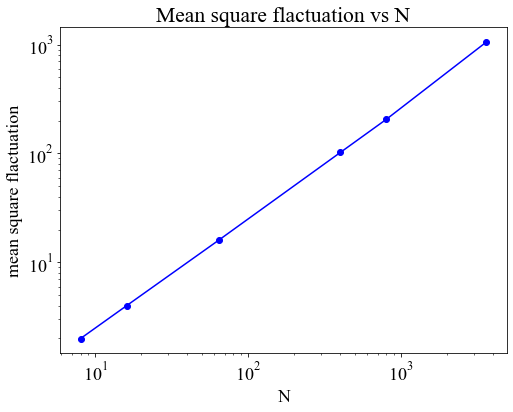

In [168]:
for i in range(6):
    print("N = {}, delta n^2 = {}".format(Nlist[i], meansq[i]))
fig,ax = plt.subplots(figsize=(8,6))
ax.loglog(Nlist,meansq,'bo-')
ax.set_xlabel('N')
ax.set_ylabel('mean square flactuation')
ax.set_title('Mean square flactuation vs N');

In [136]:
## calculate relative fluctuation
rel_fluc = np.sqrt(meansq)/En 

N = 8, rel_fluc = 0.35318806447369083
N = 16, rel_fluc = 0.2500184957432863
N = 64, rel_fluc = 0.1250068418525774
N = 400, rel_fluc = 0.05060952801658483
N = 800, rel_fluc = 0.03588982982306869
N = 3600, rel_fluc = 0.018018698876497433


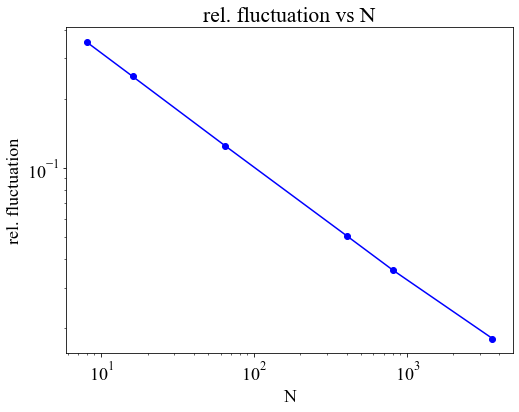

In [169]:
for i in range(6):
    print("N = {}, rel_fluc = {}".format(Nlist[i], rel_fluc[i]))
fig,ax = plt.subplots(figsize=(8,6))
ax.loglog(Nlist,rel_fluc,'bo-')
ax.set_xlabel('N')
ax.set_ylabel('rel. fluctuation')
ax.set_title('rel. fluctuation vs N');

N越大，$\Delta n^2$ 越大， 但是 $\frac{\Delta n}{ <n>}$ 越小

6. One way to calculate $\pi$ is by randomly throwing a dart into the unit square defined by $x \in [0, 1]$ and $y\in [0, 1]$ in the $xy$ plane. The chance of the `dart` landing inside the unit circle centered at the origin of the coordinates is $\pi/4$, from the comparison of the areas of one quarter of the circle and the unit square. Write a program to calculate $\pi$ in such a manner.
   In your program, repeat this experiment many times (meaning many 5000-sample trials, say 1000 such trials) and use your results to estimate the statistical uncertainty (standard deviation of the mean result) in your calculation.

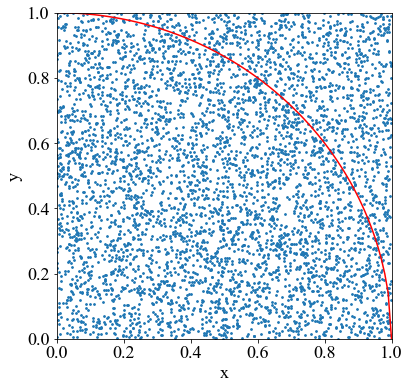

In [157]:
## make 5000 experiment, each with 5000 dot for spread randomly.
Ntrial = 1000
nsam_per_trial = 5000
samples = np.zeros(Ntrial)

for i in range(Ntrial):
    x = np.random.random(nsam_per_trial)
    y = np.random.random(nsam_per_trial)
    pi = 4*(x**2+y**2<1).sum()/nsam_per_trial
    samples[i] = pi
    if i == Ntrial-1:
        xsp = np.arange(0, 1+0.01, 0.01)
        plt.figure(figsize=(6,6))
        plt.scatter(x,y, s=3)
        plt.plot(xsp, np.sqrt(1-xsp**2),'r')
        plt.ylabel('y')
        plt.xlabel('x')
        plt.ylim(0,1)
        plt.xlim(0,1);

In [158]:
std = np.std(samples)
mean = np.mean(samples)
print('Number of trial={}, number of sample-per-trial={}'.format(Ntrial,nsam_per_trial))
print('mean:{:.3e}, standard deviation:{:.3e}'.format(mean,std))

Number of trial=1000, number of sample-per-trial=5000
mean:3.140e+00, standard deviation:2.315e-02
